In [2]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
import arch
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [3]:
#Time periods
startdate = '2017-01-01'
enddate = '2019-12-31'

#Asset 
asset = 'BTC-USD'

In [4]:
BTCUSD = pdr.DataReader(asset,'yahoo',startdate, enddate)
BTCUSD.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-01,1003.080017,958.698975,963.658020,998.325012,147775008,998.325012
2017-01-02,1031.390015,996.702026,998.617004,1021.750000,222184992,1021.750000
2017-01-03,1044.079956,1021.599976,1021.599976,1043.839966,185168000,1043.839966
2017-01-04,1159.420044,1044.400024,1044.400024,1154.729980,344945984,1154.729980
2017-01-05,1191.099976,910.416992,1156.729980,1013.380005,510199008,1013.380005


<AxesSubplot:title={'center':'BTCUSD Adj. Close'}, xlabel='Date'>

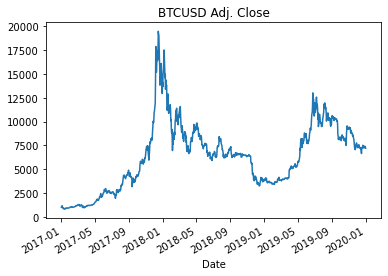

In [5]:
#view the plot
BTCUSD['Adj Close'].plot(title='BTCUSD Adj. Close')

In [6]:
#Use HP Filter
ts_noise, ts_trend = sm.tsa.filters.hpfilter(BTCUSD[['Adj Close']])

#create different dataframes for each composition
BTC_decomp = BTCUSD[['Adj Close']].copy()
BTC_decomp['noise'] = ts_noise
BTC_decomp['trend'] = ts_trend
BTC_decomp.head()

,Adj Close,noise,trend
Date,,,
2017-01-01,998.325012,-4.907424,1003.232436
2017-01-02,1021.750000,30.228229,991.521771
2017-01-03,1043.839966,64.031928,979.808038
2017-01-04,1154.729980,186.622917,968.107063
2017-01-05,1013.380005,56.905312,956.474692


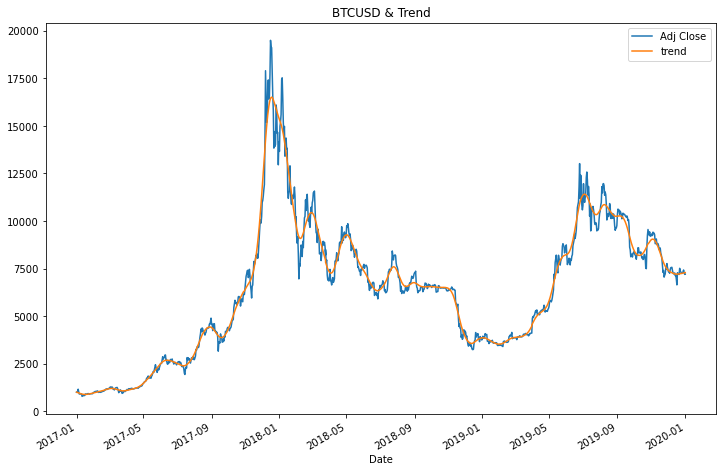

In [7]:
#Plot close v. trend
BTC_decomp[['Adj Close', 'trend']].plot(title = 'BTCUSD & Trend',figsize=(12,8));

<AxesSubplot:title={'center':'Noise of BTCUSD'}, xlabel='Date'>

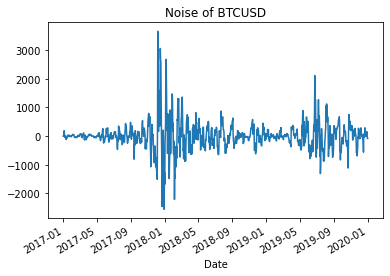

In [8]:
# plot noise
ts_noise.plot(title='Noise of BTCUSD')

In [9]:
# Apply ARMA
returns = (BTCUSD[['Adj Close']].pct_change()*100)
returns = returns.replace(-np.inf, np.nan).dropna()
returns.tail()

,Adj Close
Date,
2019-12-28,0.382737
2019-12-29,1.430210
2019-12-30,-1.746784
2019-12-31,-1.362897
2020-01-01,0.091403


In [10]:
#Make AR(autocorrelation) MA(moving average) model (2,1)
model = sm.tsa.ARMA(returns, order=(2,1))

#Fit ARMA model
results = model.fit()

#load summary
results.summary()

/Users/hopeforrester/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/hopeforrester/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been prov

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                 1095
Model:                     ARMA(2, 1)   Log Likelihood               -3157.316
Method:                       css-mle   S.D. of innovations              4.325
Date:                Mon, 11 Jan 2021   AIC                           6324.632
Time:                        13:29:09   BIC                           6349.624
Sample:                             0   HQIC                          6334.089
                                                                              
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2639      0.195      1.356      0.175      -0.117       0.645
ar.L1.Adj Close     0.9711      0.043     22.335      0.000       0.886       1.056
ar.L2.Adj Close     0.0117      0.031      0.380      0.704      -0.049       0.072
ma.L1.Adj Close    -0.9740      0.031    -31.042      0.000      -1.035      -0.912
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0173           +0.0000j            1.0173            0.0000
AR.2          -83.8359           +0.0000j           83.8359            0.5000
MA.1            1.0267           +0.0000j            1.0267            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:title={'center':'Forcast ARMA next 5 days'}>

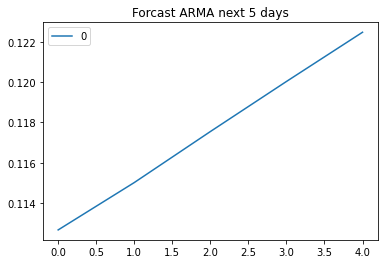

In [11]:
# Forcast next 5 days
pd.DataFrame(results.forecast(steps=5)[0]).plot(title='Forcast ARMA next 5 days')

In [22]:
#AR(autocorrelation) I(difference) MA(moving average) model
model = ARIMA(BTCUSD[['Adj Close']], order=(1,1,1))

#Fit
results = model.fit()

#summary
results.summary()


/Users/hopeforrester/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/hopeforrester/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been prov

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.Adj Close   No. Observations:                 1095
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -8027.622
Method:                       css-mle   S.D. of innovations            369.524
Date:                Mon, 11 Jan 2021   AIC                          16063.244
Time:                        13:44:24   BIC                          16083.238
Sample:                             1   HQIC                         16070.810
                                                                              
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.6577     11.504      0.492      0.623     -16.889      28.205
ar.L1.D.Adj Close    -0.7305      0.116     -6.291      0.000      -0.958      -0.503
ma.L1.D.Adj Close     0.7827      0.105      7.460      0.000       0.577       0.988
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3690           +0.0000j            1.3690            0.5000
MA.1           -1.2776           +0.0000j            1.2776            0.5000
-----------------------------------------------------------------------------
"""

<AxesSubplot:title={'center':'Forcast ARIMA next 5 days'}>

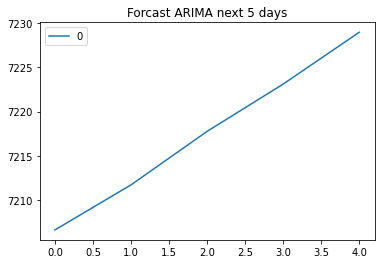

In [23]:
# Forcast next 5 days
pd.DataFrame(results.forecast(steps=5)[0]).plot(title='Forcast ARIMA next 5 days')

In [24]:
#GARCH - for near term volatility
model = arch.arch_model(returns, mean='zero', vol='GARCH', p=1,q=1)

#fit model
results = model.fit()

#summary output
results.summary()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 5582.559730806584
Iteration:      2,   Func. Count:     11,   Neg. LLF: 373662108.8160155
Iteration:      3,   Func. Count:     16,   Neg. LLF: 3093.1109855644163
Iteration:      4,   Func. Count:     21,   Neg. LLF: 7012.268671343212
Iteration:      5,   Func. Count:     26,   Neg. LLF: 3103.10190583022
Iteration:      6,   Func. Count:     31,   Neg. LLF: 3071.2580821280862
Iteration:      7,   Func. Count:     36,   Neg. LLF: 3069.8242349288394
Iteration:      8,   Func. Count:     40,   Neg. LLF: 3069.8196550499797
Iteration:      9,   Func. Count:     44,   Neg. LLF: 3069.819643221136
Iteration:     10,   Func. Count:     48,   Neg. LLF: 3069.8196423030968
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3069.8196423030968
            Iterations: 10
            Function evaluations: 48
            Gradient evaluations: 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:               -3069.82
Distribution:                  Normal   AIC:                           6145.64
Method:            Maximum Likelihood   BIC:                           6160.63
                                        No. Observations:                 1095
Date:                Mon, Jan 11 2021   Df Residuals:                     1092
Time:                        13:44:24   Df Model:                            3
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          1.2890      0.554      2.328  1.992e-02   [  0.204,  2.374]
alpha[1]       0.1392  3.982e-02      3.496  4.726e-04 [6.116e-02,  0.217]
beta[1]        0.7950  4.922e-02     16.151  1.116e-58   [  0.699,  0.891]
==========================================================================

Covariance estimator: robust
"""

In [25]:
#Create 5 day forecast of volatility of BTCUSD
forecast_horizon = 5

#start forecast
forecasts = results.forecast(horizon=forecast_horizon)

# Annual the forecast
intermediate = np.sqrt(forecasts.variance.dropna() * 252)
intermediate.head()

,h.1,h.2,h.3,h.4,h.5
Date,,,,,
2020-01-01,44.832123,46.93046,48.809273,50.501331,52.032345


In [26]:
#Transpose forecasts
final = intermediate.dropna().T
final.head()

Date,2020-01-01
h.1,44.832123
h.2,46.930460
h.3,48.809273
h.4,50.501331
h.5,52.032345


<AxesSubplot:title={'center':'GARCH next 5 days'}>

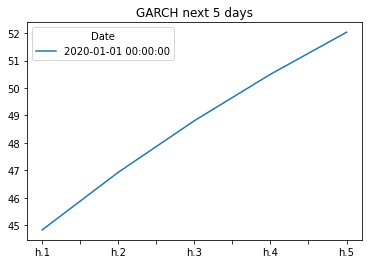

In [27]:
#plot the volatiltiy forecast for 5 days
final.plot(title='GARCH next 5 days')

In [28]:
# Linear regression
BTCUSD['Return'] = BTCUSD[['Adj Close']].pct_change()*100
BTCUSD.dropna(inplace=True)
BTCUSD.head()

,High,Low,Open,Close,Volume,Adj Close,Return
Date,,,,,,,
2017-01-02,1031.390015,996.702026,998.617004,1021.750000,222184992,1021.750000,2.346429
2017-01-03,1044.079956,1021.599976,1021.599976,1043.839966,185168000,1043.839966,2.161974
2017-01-04,1159.420044,1044.400024,1044.400024,1154.729980,344945984,1154.729980,10.623277
2017-01-05,1191.099976,910.416992,1156.729980,1013.380005,510199008,1013.380005,-12.240955
2017-01-06,1046.810059,883.943970,1014.239990,902.200989,351876000,902.200989,-10.971108


In [29]:
#create lagged returns
BTCUSD['Lagged_Return'] = BTCUSD['Return'].shift()
BTCUSD.dropna(inplace=True)
BTCUSD.head()

,High,Low,Open,Close,Volume,Adj Close,Return,Lagged_Return
Date,,,,,,,,
2017-01-03,1044.079956,1021.599976,1021.599976,1043.839966,185168000,1043.839966,2.161974,2.346429
2017-01-04,1159.420044,1044.400024,1044.400024,1154.729980,344945984,1154.729980,10.623277,2.161974
2017-01-05,1191.099976,910.416992,1156.729980,1013.380005,510199008,1013.380005,-12.240955,10.623277
2017-01-06,1046.810059,883.943970,1014.239990,902.200989,351876000,902.200989,-10.971108,-12.240955
2017-01-07,908.585022,823.556030,903.487000,908.585022,279550016,908.585022,0.707607,-10.971108


In [30]:
# Create train/test data
train = BTCUSD[:'2017']
test = BTCUSD['2018':]

#Set X (features) and Y (predict) values
x_train = train['Lagged_Return'].to_frame()
y_train = train['Return']
x_test = train['Lagged_Return'].to_frame()
y_test = train['Return']

##x_train

In [31]:
#Fit the linear model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

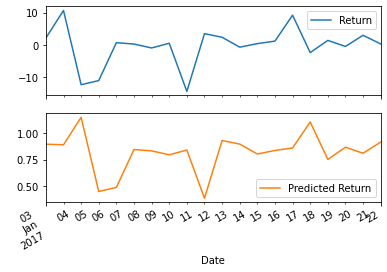

In [32]:
#make predictions on test set
predictions = model.predict(x_test)

#put results in df format
Results = y_test.to_frame()
Results['Predicted Return'] = predictions

#20 predictions
Results[:20].plot(subplots=True);

In [33]:
# Construct a dataframe using just the "y" training data:
in_sample_results = y_train.to_frame()

# Add a column of "in-sample" predictions to that dataframe:  
in_sample_results["In-sample Predictions"] = model.predict(x_train)

# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
in_sample_mse = mean_squared_error(
    in_sample_results["Return"],
    in_sample_results["In-sample Predictions"]
)

# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
in_sample_rmse = np.sqrt(in_sample_mse)
print(f"In-sample Root Mean Squared Error (RMSE): {in_sample_rmse}")

In-sample Root Mean Squared Error (RMSE): 4.993806451825074


In [34]:
# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 
# (Hint: use the dataframe above)
mse = mean_squared_error(
    Results["Return"],
    Results["Predicted Return"]
)

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
out_of_sample_rmse = np.sqrt(mse)
print(f"Out-of-Sample Root Mean Squared Error (RMSE): {out_of_sample_rmse}")

Out-of-Sample Root Mean Squared Error (RMSE): 4.993806451825074
